### Implement Haar Cascade Classifier to detect vehicle in image

In [3]:
#import all librares
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

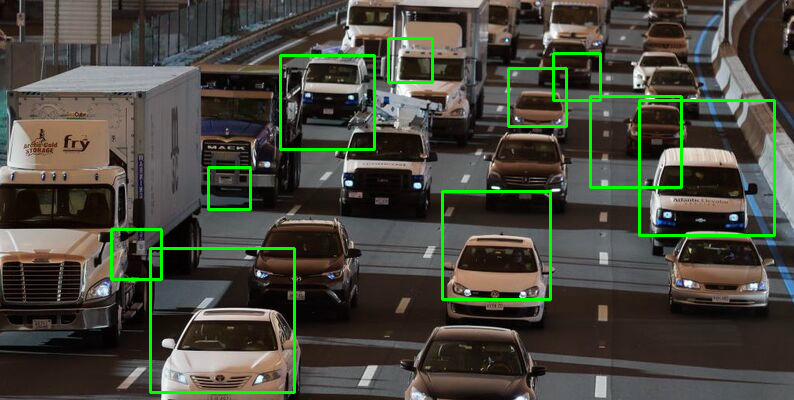

In [4]:
# Load the image
image = cv2.imread("vehicle_image/vehicle-1.jpg")
image_arr = np.array(image)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Gaussian kernel
blur = cv2.GaussianBlur(gray,(5,5),0)
Image.fromarray(blur)

#using dilate to increases the white region in the image
dilated = cv2.dilate(blur,np.ones((3,3)))

#Morphology transformation with kernel is used to find the difference between dilation and erosion of an image. 
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel) 

# Load the pre-trained Haar Cascade XML file for vehicle detection
car_cascade = cv2.CascadeClassifier("haarcascade_car.xml")
cars = car_cascade.detectMultiScale(closing, 1.1, 2,minSize=(30, 30))

for (x,y,w,h) in cars:
  cv2.rectangle(image_arr,(x,y),(x+w,y+h),(0,255,0),2) 
Image.fromarray(image_arr)